In [1]:
# Importing libraries - 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")
import copy

## 1.Defining Problem Statement and Analyzing basic metrics - 

### About Walmart -
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and 
grocery stores from the United States. Walmart founded in 1962 by Sam Walton. Walmart has more than 100 million customers worldwide.
Beyond retail, Walmart has also ventured into emcommerce, technology innovation, and sustainability initiatives, further solidyfying its position as key player in the modern reatail ecosystem.

### Business Problem - 
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customers's gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? 

### Objective - 
The objective of this project is to conduct a comprehensive analysis of customers purchase behavior, with a specific focus on pruchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data - driven decisons.


In [34]:
data = pd.read_csv("walmart_data.csv")

In [35]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [36]:
data.shape

(550068, 10)

#### Dataset contains 550068  rows and 10 columns.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


1. The colums User_id, Occupation, Marital_Status, Product_Category and Purchase are in integer datatype, rest of the columns are in object dataype.
2. There are no null values.

In [38]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

The columns gender, age, city_category, stay_in_current_city_years and marital status can be converted into category datatype.

In [39]:
# Converting some column into categorical datatype - 

dt = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
for i in dt:
    data[i] = data[i].astype("category")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


### Statistical Summary -

In [41]:
data.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


1. Range of purchase amount is 12 dollars to 23961 dollars.
2. Mean purchase amount is 9264 dollars.
3. Median purchase amount is 8047 dollars.
4. Standard deviation of purchase amount is 5023 dollars.
5. Inter quartile range of purchase amount is 5823 to 12054 dollars.

## 2.Non-Graphical Analysis - 

### Value Counts and Unique Attributes -

In [42]:
# Value counts for first 5 columns - 

for i in data.columns[:5]:
    print("Value counts for column", i,"-")
    print(data[i].value_counts())
   
    


Value counts for column User_ID -
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
Value counts for column Product_ID -
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
Value counts for column Gender -
M    414259
F    135809
Name: Gender, dtype: int64
Value counts for column Age -
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
Value counts for column Occupation -
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
1

In [43]:
for i in data.columns[5:]:
    print("Value counts for column", i, "-")
    print(data[i].value_counts())

Value counts for column City_Category -
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
Value counts for column Stay_In_Current_City_Years -
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
Value counts for column Marital_Status -
0    324731
1    225337
Name: Marital_Status, dtype: int64
Value counts for column Product_Category -
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
Value counts for column Purchase -
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64


1. Product categories 5,1 and 8 sell more than other categories.
2. Product categories 17 and 9 sell the least.
3. Most frequent users have made almost 1000 purchases.
4. Least frequent users have made 6 to 7 purchases.
5. The most sold product is "P00265242".
6. People in age group 26-35 has more purchases than other age group.
7. People of city category B make more purchases than other city category.
8. Male users - 414259 and Female users - 135809
9. Unmarried people has more purchases than married people.

## 3. Missing Value & Outlier Detection -

In [44]:
# Finding outliers using IQR method -

for i in ["Purchase"]:
    outliers = []
    p25 = np.percentile(data[i], 25)
    p75 = np.percentile(data[i], 75)
    
    iqr = p75 - p25
    max_cut = p75 + iqr*1.5
    min_cut = max(0, p25 - iqr*1.5)
    
    outliers = data.loc[(data[i]<min_cut) | (data[i]>max_cut), i]
    
    print("Outliers for the column", i, "-")
    print(outliers)
    print("Number of outliers - ", len(outliers))
    print("Percentage of outliers = ", round((len(outliers)/len(data[i]))*100,2), "%")

Outliers for the column Purchase -
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
Number of outliers -  2677
Percentage of outliers =  0.49 %


1. Purchase columns contains 2677 outliers.
2. This is 0.49% of total number of entries.

In [45]:
# Missing value - 

data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There is no missing value in any column.

## 4. Visual Analysis - Univariate & Bivariate-

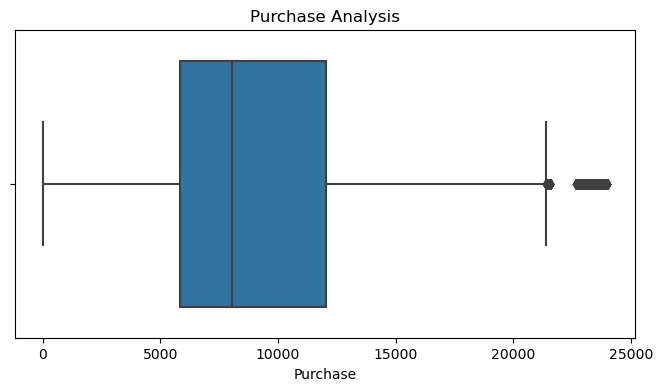

In [46]:
# Purchase Analysis - Box Plot

plt.figure(figsize = (8,4))
sns.boxplot(data = data, x = "Purchase")
plt.title("Purchase Analysis")
plt.show()


1. Median purchase is about 8000 dollars.
2. Inter Quartile Range is 6000 to 12000 dollars.
3. There are many outliers.

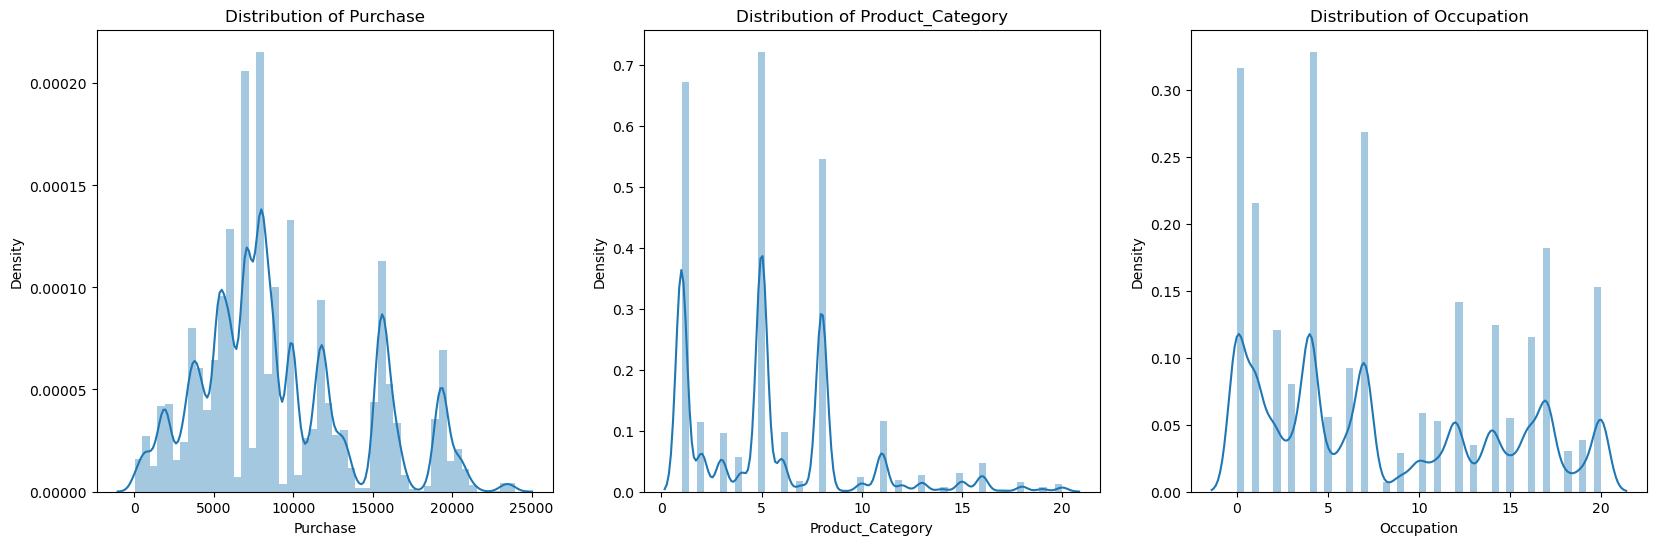

In [47]:
# Distribution plots - 

dt = ["Purchase", "Product_Category", "Occupation"]
plt.figure(figsize = (20,6))
for i in range(len(dt)):
    plt.subplot(1,3, i+1)
    sns.distplot(data[dt[i]])
    plt.title("Distribution of {feature}".format(feature = dt[i]))

plt.show()

1. Purchase amounts range between 0 and 25000.
2. Purchase amounts between 5000 to 10000 are maximum.
3. Product categories 1, 5 and 8 are most frequnetly purchased.
4. There are 20 product categories.
5. There are 21 different occupations.
6. People with occupations 0, 4 and 7 make more purchase than other occupations.

In [48]:
# Creating bins of purchase amount - 
data["purchase_bins"] = pd.cut(data["Purchase"], bins = [0,5000,10000,15000,20000,25000])

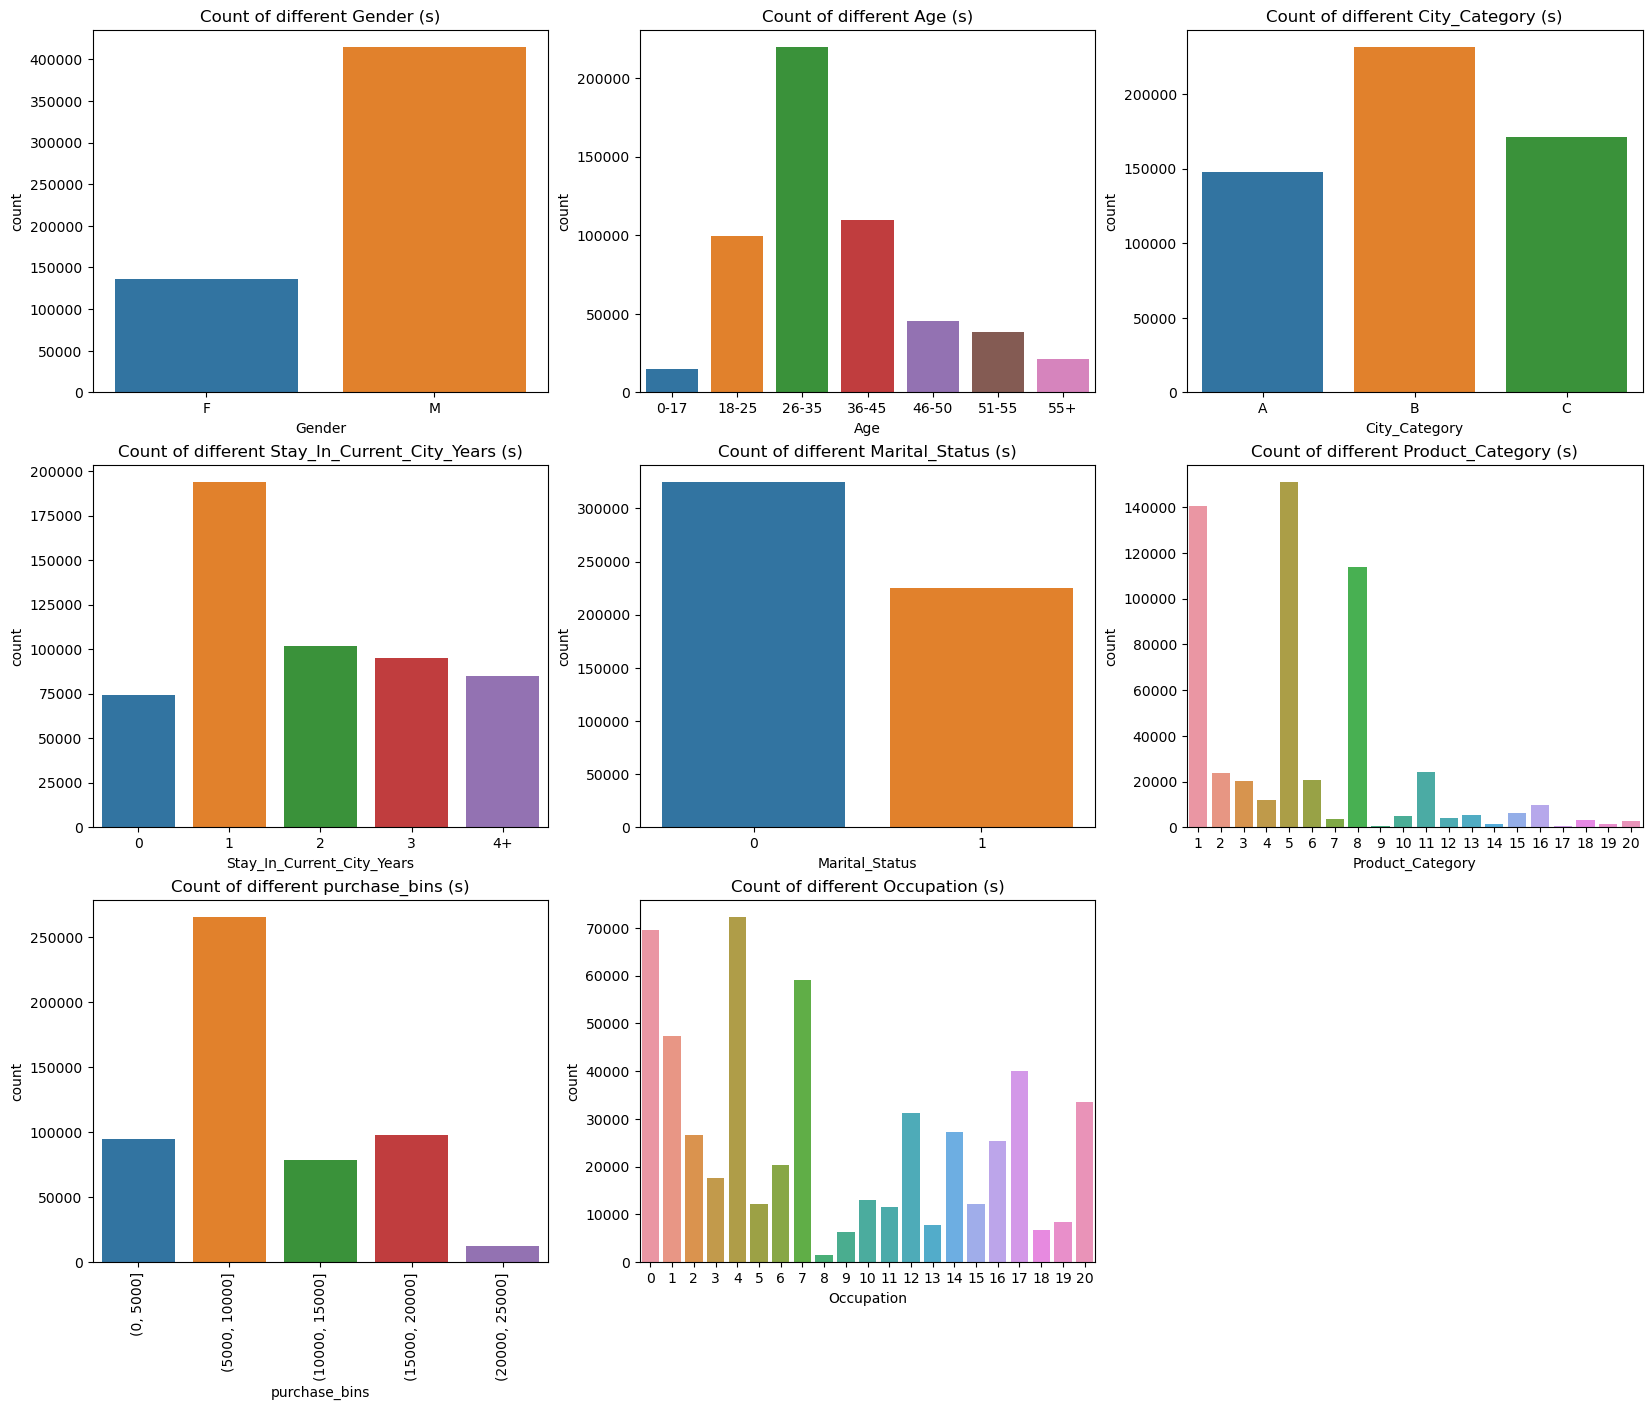

In [49]:
# Categorical variables - Count Plots

plt.figure(figsize =(20,16))

dt = ["Gender","Age","City_Category","Stay_In_Current_City_Years", "Marital_Status", "Product_Category", "purchase_bins", "Occupation"]

for i in range(len(dt)):
    plt.subplot(3,3, i+1)
    sns.countplot(x = data[dt[i]])
    plt.title("Count of different {dt_i} (s)".format(dt_i = dt[i]))
    if dt[i] in ["purchase_bins"]:
        plt.xticks(rotation = 90)
plt.show()


1. More purchases made by males than females.
2. People of age group 26-35 have made the maximum purchases.
3. People in cities of category B have made maximun number of purchases.
4. Unmarried people made more puchases than married people.
5. Products of category 1, 5 and 8 sold most frequently.
6. Purchases of amount (5000, 10000) were maximum in number.
7. People of having occupation 0,4 and 7 made more purchases than other occupations.

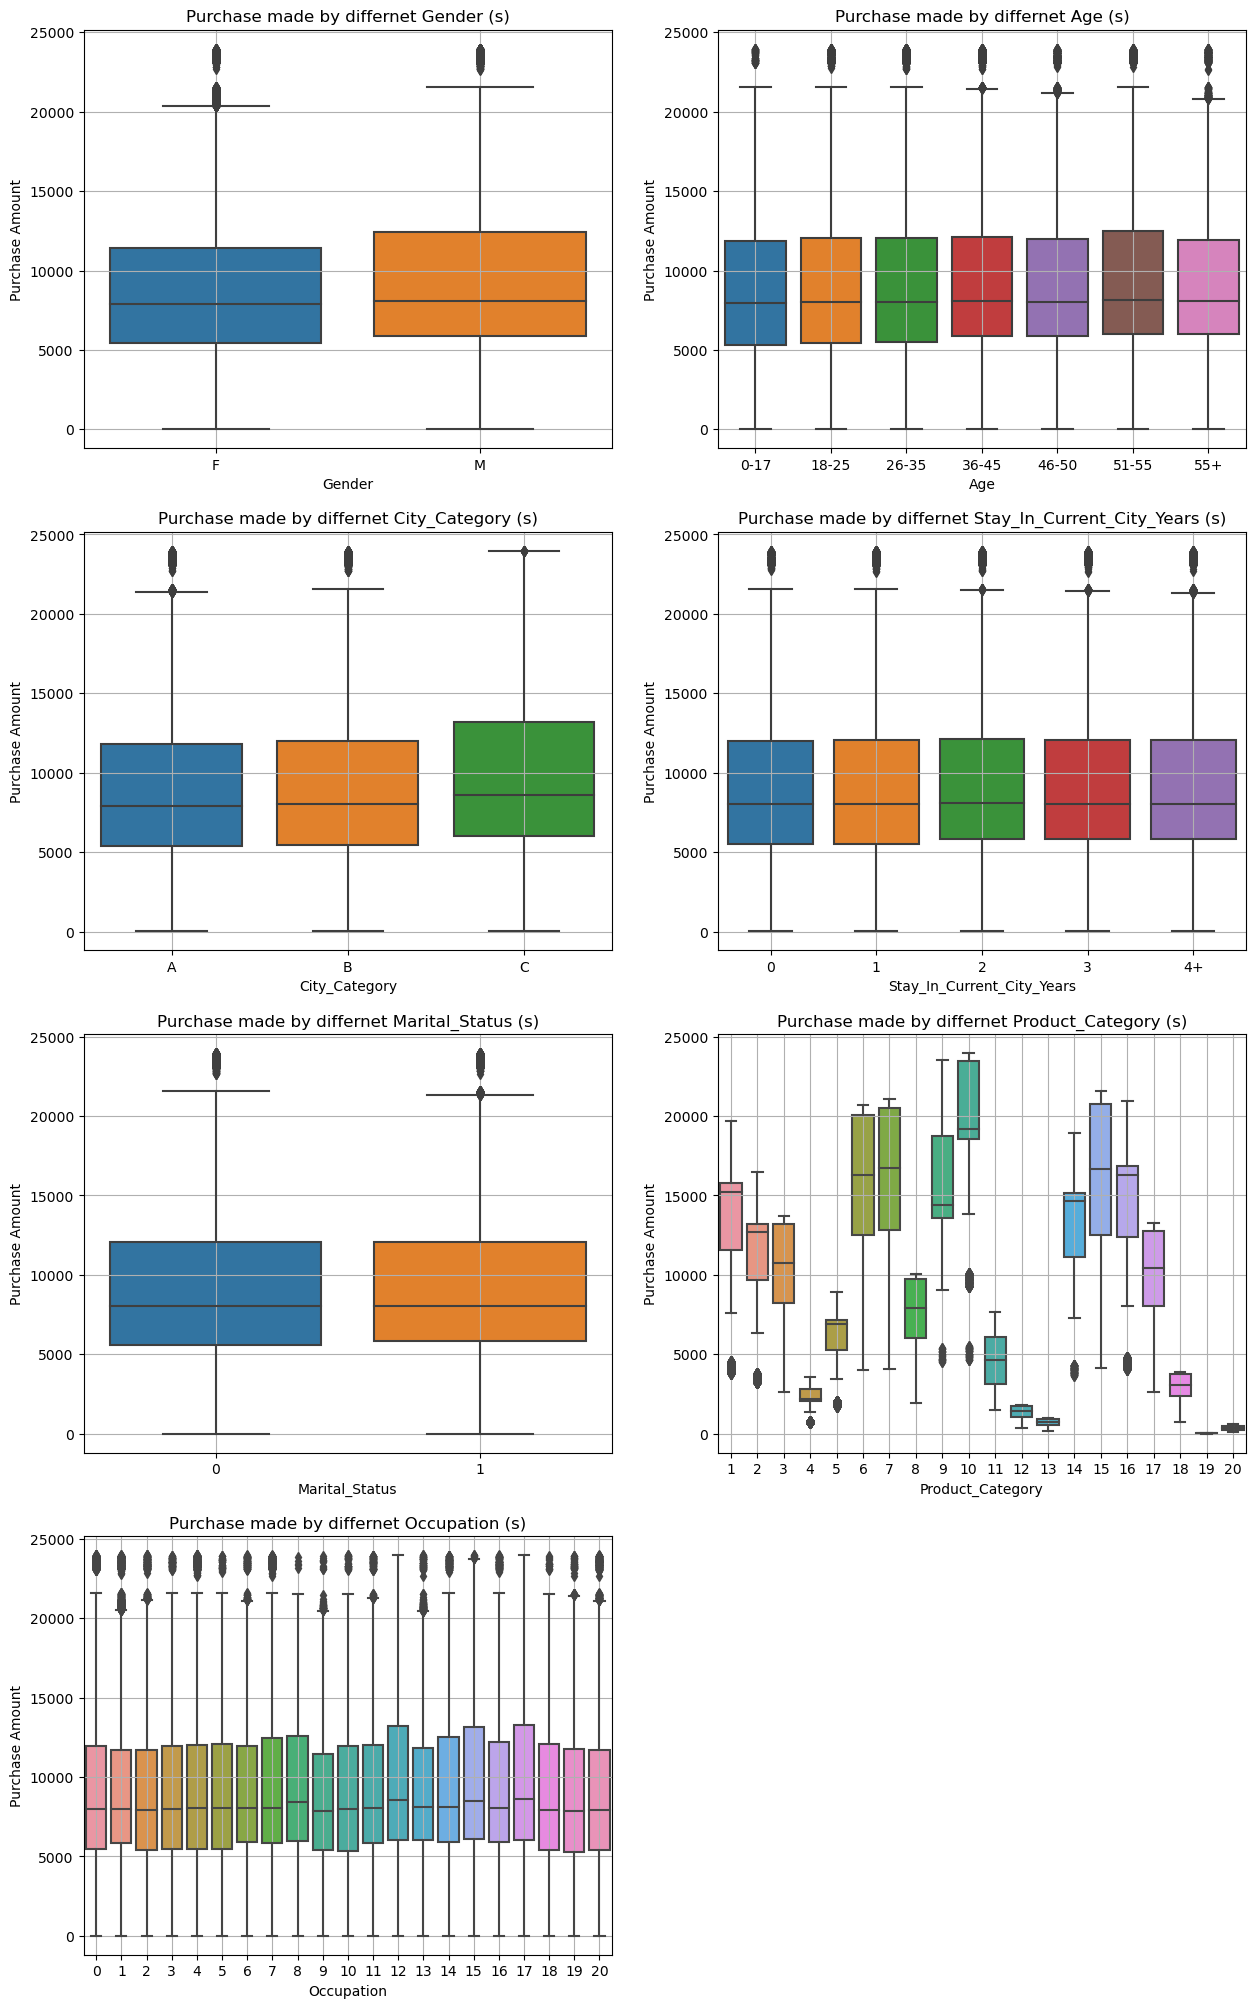

In [50]:
# Purchase vs Categorical-Variable  - bi-variate boxplots 

plt.figure(figsize = (15,25))

dt = ["Gender","Age","City_Category","Stay_In_Current_City_Years", "Marital_Status", "Product_Category", "Occupation"]
for i in range(len(dt)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = data[dt[i]], y = data["Purchase"])
    plt.title("Purchase made by differnet {dt_i} (s)".format(dt_i = dt[i]))
    plt.ylabel("Purchase Amount")
    plt.grid()
plt.show()


1. Median purchase amounts of males and females are similar.
2. Median purchase amounts of all age group are similar.
3. Median purchase amounts of city of category C is slightly higher than other city categories.
4. Median purchase amounts of product category 10 is highest, category 19 is lowest.
5. Median purchase amounts of occupations 12 and 17 are slighlty higher than other occupations.

In [51]:
# Converting Gender, Age and City_Category to numeric data - 

data_copy = data.copy()
data_copy["Gender"].replace({"F" : 1, "M" : 0}, inplace = True)
data_copy["Age"].replace({"0-17" : 1, "18-25" : 2, "26-35" : 3, "36-45" : 4, "46-50": 5, "51-55" : 6, "55+" : 7 },inplace = True)
data_copy["City_Category"].replace({"A" : 1, "B" : 2, "C" : 3}, inplace = True)


In [52]:
# Finding Pearson Correlation between all the numerical features -

data_copy.corr()

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


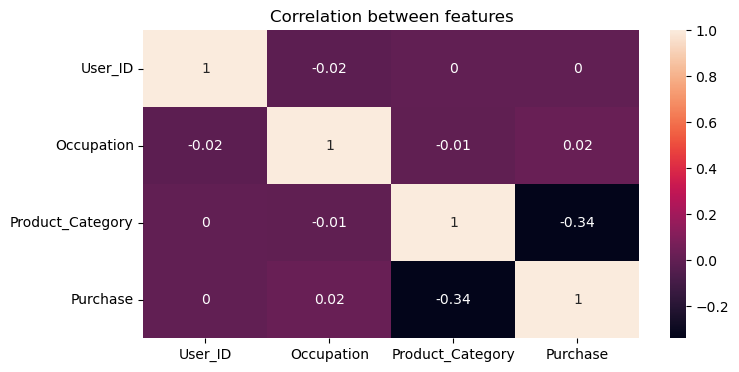

In [53]:
# Heatmap for the above correlation values - 

plt.figure(figsize = (8,4))
sns.heatmap(data_copy.corr().round(2), annot = True)
plt.title("Correlation between features", fontsize = 12)
plt.show()


1. There is no strong correlation of purchase with any feature.
2. There's a weak negative correlation between product category and purchase amount.


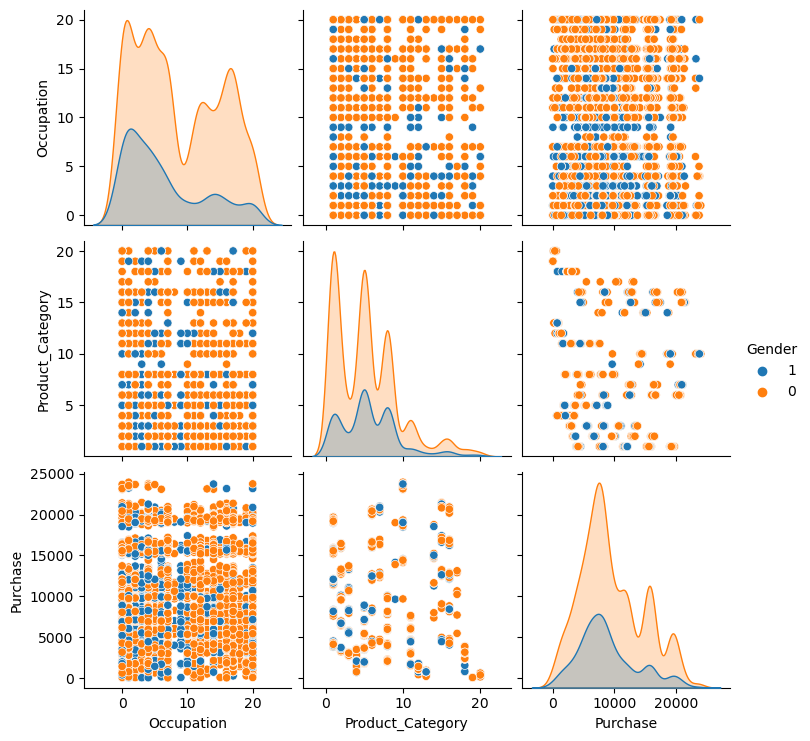

In [54]:
# Pair plot - 
# Blue - Male , Orange - Female

sns.pairplot(data_copy.sample(5000).iloc[:,1:], hue = "Gender")
plt.show()


1. Most popular product category among males is 1.
2. Most popular product category among female is 5. 
3. Both males and females of city category B make more purchase compared to city categories A and C.
4. Females purchase products of category 4, 11, 15, 17 and 18 less often.
5. Females with occupation 0-10 made more puchases than females with occupations 11-20.

## Sampling -  

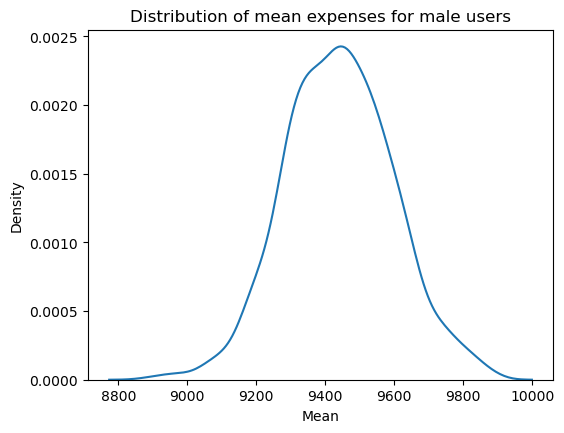

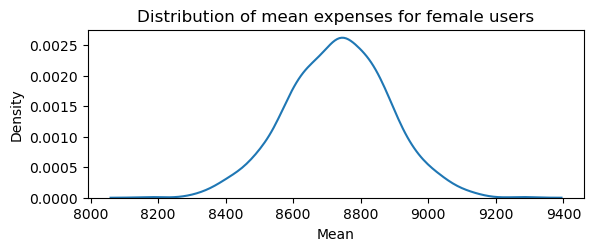

In [55]:
# Creating kde plots to check if it appears gaussian - 

plt.figure(figsize = (6,10))
x = 1
for j in ["M", "F"]:
    means = []
    for i in range(1000):
        dt = data.loc[data["Gender"]==j, "Purchase"].sample(1000)
        avg = dt.mean()
        means.append(avg)
        
    plt.subplot(2,1,x)
    sns.kdeplot(x = means)
    
    if j == "M":
        gen = "male"
        means_m = means
    else:
        gen = "female"
        means_f = means
    
    plt.title("Distribution of mean expenses for {g} users".format(g = gen), fontsize = 12)
    plt.xlabel("Mean")
    x += 1
    plt.show()


The distributions appear to be gaussian.

In [56]:
# Finding differnet Confidence Intervals for Males and Females - 

for i in ["males", "females"]:
    print("For {g}-".format(g = i))
    if i == "males":
        means = means_m
        gen = "M"
    else:
        means = means_f
        gen = "F"
        
    print("Mean of sample means =", np.mean(means))
    print("Population mean =", np.mean(data.loc[data["Gender"]== gen, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population = ", data.loc[data["Gender"] == gen, "Purchase"].std())
    print("99% CONFIDENCE INTERVAL for mean expense by {g} users -".format(g = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by {g} users -".format(g = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by {g} users -".format(g = i))
    print((np.percentile (means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-" * 80)
  

For males-
Mean of sample means = 9439.955219999998
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 156.5393779659853
Standard deviation of population =  5092.186209777949
99% CONFIDENCE INTERVAL for mean expense by males users -
(9006.16, 9833.97)
95% CONFIDENCE INTERVAL for mean expense by males users -
(9149.46, 9757.33)
90% CONFIDENCE INTERVAL for mean expense by males users -
(9190.23, 9702.42)
--------------------------------------------------------------------------------
For females-
Mean of sample means = 8731.713572
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 150.16208429171067
Standard deviation of population =  4767.233289291444
99% CONFIDENCE INTERVAL for mean expense by females users -
(8348.13, 9103.63)
95% CONFIDENCE INTERVAL for mean expense by females users -
(8420.13, 9024.54)
90% CONFIDENCE INTERVAL for mean expense by females users -
(8480.03, 8973.4)
-----------------------------------------

1. Mean purchase amount for Males = 9437.52
2. Mean purchase amount for Females = 8734.56
3. 95% Confidence Interval for purchase amount of females is less than males.
4. With 95% Confidence Interval we can say females spend less than males.

### Married and Unmarried users - 

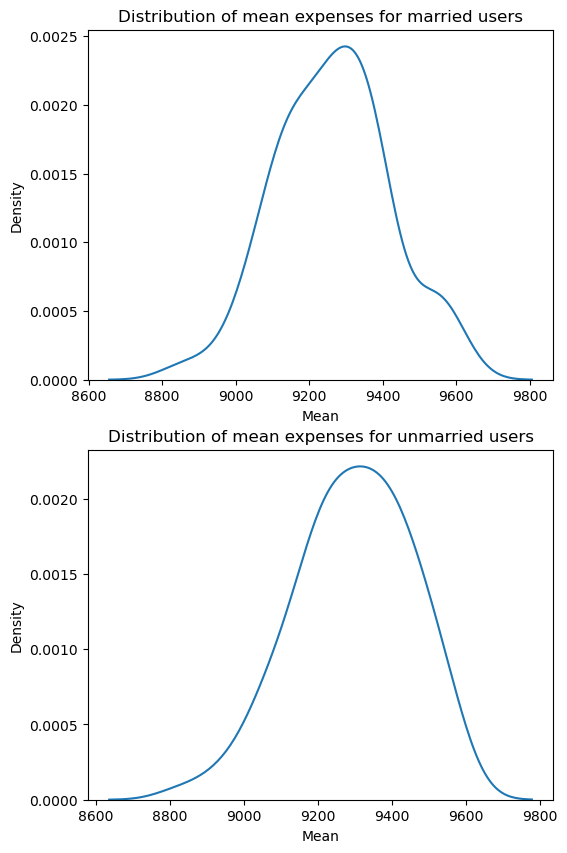

In [57]:
# Taking samples of 1000 entries, creating kde plots to check if it appears gaussian - 

plt.figure(figsize = (6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        dt = data.loc[data["Marital_Status"] == j, "Purchase"].sample(1000)
        avg = dt.mean()
        means.append(avg)
    
    plt.subplot(2,1,x)
    sns.kdeplot(x = means)
    
    if j == 0:
        ms = "unmarried"
        means_mr = means
    else:
        ms = "married"
        means_umr = means
    
    plt.title("Distribution of mean expenses for {m} users".format(m = ms), fontsize = 12)
    plt.xlabel("Mean")
    x += 1

plt.show()


In [58]:
# Different Confidence Interval for mean expense by married and unmarried customers - 

for i in ["married", "unmarried"]:
    print("For {m}-".format(m = i))
    if i == "married":
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    
    print("Mean of sample means =", np.mean(means))
    print("Population mean =", np.mean(data.loc[data["Marital_Status"] == ms, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population =", data.loc[data["Marital_Status"] == ms, "Purchase"].std())
    print("99% CONFIDENCE INTERVALL for mean expense by {m} users-".format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by {m} users-".format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by {m} users-".format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-" * 80)
    


For married-
Mean of sample means = 9295.264439999999
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 158.13897940895657
Standard deviation of population = 5016.89737779313
99% CONFIDENCE INTERVALL for mean expense by married users-
(8872.73, 9585.42)
95% CONFIDENCE INTERVAL for mean expense by married users-
(8966.48, 9551.7)
90% CONFIDENCE INTERVAL for mean expense by married users-
(9035.77, 9528.48)
--------------------------------------------------------------------------------
For unmarried-
Mean of sample means = 9264.39455
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 154.55309722023523
Standard deviation of population = 5027.347858674457
99% CONFIDENCE INTERVALL for mean expense by unmarried users-
(8870.4, 9602.38)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8982.57, 9570.88)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(9031.77, 9549.61)
---------------------------------

1. Mean expense by married customers is 9261.17
2. Mean expense by unmarried customers is 9265.90
3. There is overlap between 90%, 95% and 99% Confidence Intervals for both.

### For different age groups-

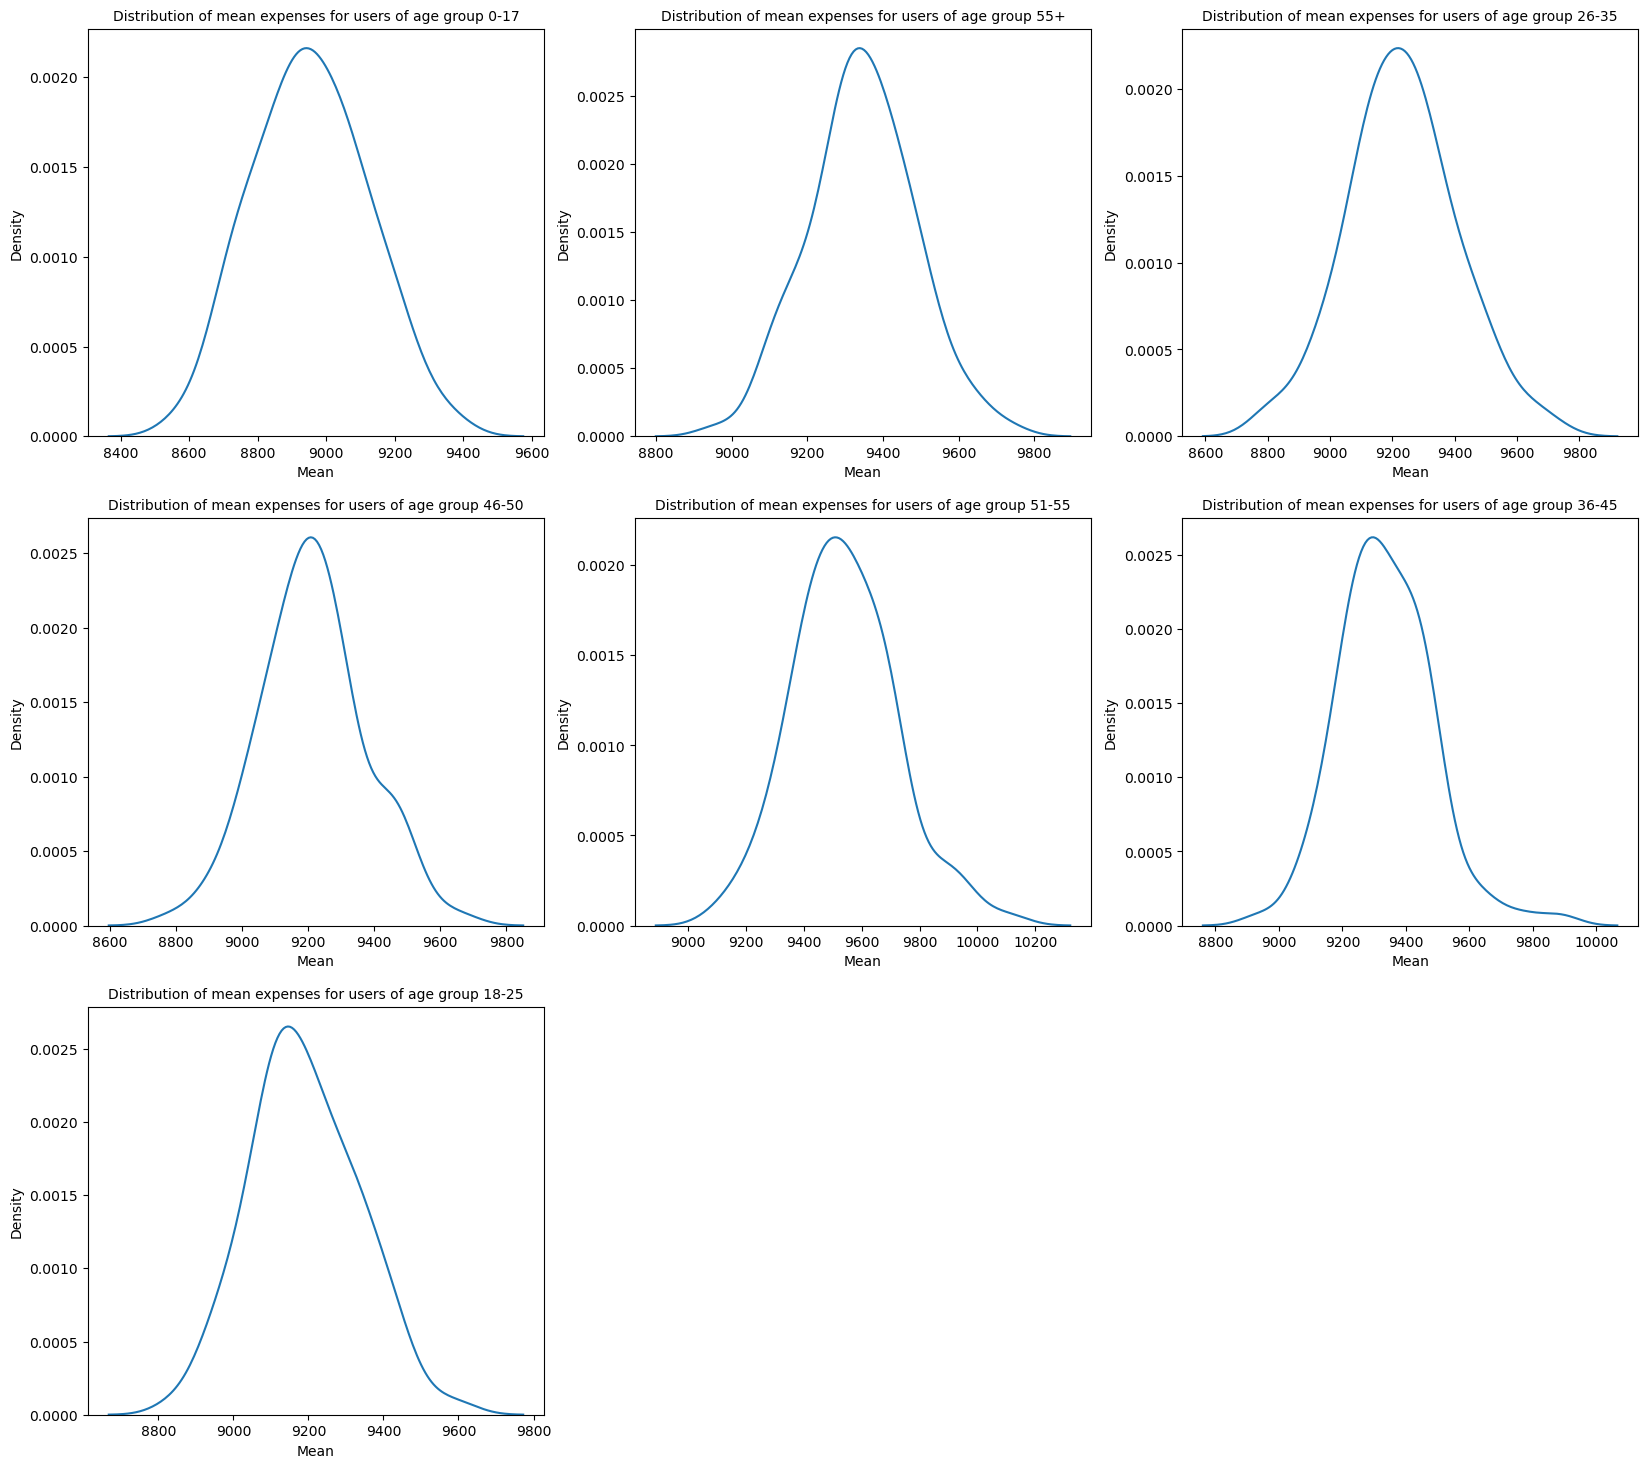

In [59]:
# Plotting KDE plots to see if their distribution looks gaussian - 

plt.figure(figsize = (20,18))
x = 1
for j in ["0-17", "55+", "26-35", "46-50", "51-55", "36-45", "18-25"]:
    means = []
    for i in range(100):
        dt = data.loc[data["Age"] == j, "Purchase"].sample(1000)
        avg = dt.mean()
        means.append(avg)
    
    plt.subplot(3,3,x)
    sns.kdeplot(x = means)
    
    if j == "0-17":
        means_0 = means
    elif j == "55+":
        means_55 = means
    elif j == "26-35":
        means_26 = means
    elif j == "46-50":
        means_46 = means
    elif j == "51-55":
        means_51 = means
    elif j == "36-45":
        means_36 = means
    else:
        means_18 = means
        
    plt.title("Distribution of mean expenses for users of age group {a}".format(a = j), fontsize = 10)
    plt.xlabel("Mean")
    x += 1

plt.show()



In [60]:
# Finding Confidence Intervals for mean purchase for each age group - 

for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print("For {m}-".format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18
    
    print("Mean of samples means =", np.mean(means))
    print("Population mean =", np.mean(data.loc[data["Age"]==i, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population =", data.loc[data["Age"]==i, "Purchase"].std())
    print("99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-".format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-".format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-".format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-" * 50)

For 0-17-
Mean of samples means = 8953.73249
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 165.74795024726524
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8589.38, 9351.29)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8675.01, 9263.85)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8695.9, 9210.83)
--------------------------------------------------
For 55+-
Mean of samples means = 9345.25404
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 138.03143985280462
Standard deviation of population = 5011.493995603418
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9025.38, 9688.54)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9092.13, 9630.2)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9108.07, 9557.02)
----------------------------

1. 99% Confidence Interval for 0-17 is less than 51-55 without overlap.
2. With  99% confidence we can say that expense of 0-17 is less compared to expense of 51-55 ages.

## Insights - 

#### 1. Sample Size - 

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

#### 2. Confidence Intervals -

From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.

#### 3. Population Average -

We are 95% confident that the true population average for males falls between $9,393 and $9,483, and for females, it falls between $8,692 and $8,777.

#### 4. Women spend less -

Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.

5. Products of categories 1, 5 and 5 can be kept in inventory as well as made easily visible in the stores.
6. Offers/ rewards can be given on purchases above 12000 dollarss to nudge customers to make more purchases.
7. More popular products among people with occupations 0, 4 and 7 can be kept in store.
8. Walmart products like P00265242 and P00025442 are selling a lot. Products like P00056342 and P00350742 are selling very less.
9. Ads can be targeted towards unmarried people because of sell.
10. Ads for slightly expensive products can be targetted towards people with occupation 12 and 17.
11. Ads can be targeted towards people who have spent between 1 to 2 years in their cities.

## Recommendations - 

#### 1.Target Male Shoppers -

Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

#### 2. Focus on 26 - 45 Age Group -

With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

#### 3. Engage Younger Shoppers -

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

#### 4. Post-Black Friday Engagement -

After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.

5. Give offers on purchases above 12000 to nudge customers to spend more.
6. Target ads towards people of city category B.
7. Target ads for product which cost between 9151 and 9790 towards males.
8. Target ads for product which cost between 8507 and 9051 towards females.
9. Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. 
10. Age group between 26 - 45 accounts to almost 60% of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.
